In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_paths_completed = pd.read_csv('TW - Station Graph Input - completed_paths.csv')
paths_completed = df_paths_completed.values.tolist()
# paths_completed
len(paths_completed)
df_paths_completed

,no.,stationid,start,id_start,end,id_end,pathkind,waykind,LocationHintStructuredHint,time,station_type
0,NaN,TaiwanStation_NanJingFuXingNanjingFuxing,exit,TaiwanStation_NanJingFuXingNanjingFuxing_1,facility,TaiwanStation_NanJingFuXingNanjingFuxing_Ticke...,between,ELEVATOR,NaN,180,complex
1,NaN,TaiwanStation_NanJingFuXingNanjingFuxing,exit,TaiwanStation_NanJingFuXingNanjingFuxing_1,facility,TaiwanStation_NanJingFuXingNanjingFuxing_Ticke...,between,ESCALATOR,NaN,180,complex
2,NaN,TaiwanStation_NanJingFuXingNanjingFuxing,exit,TaiwanStation_NanJingFuXingNanjingFuxing_1,facility,TaiwanStation_NanJingFuXingNanjingFuxing_Ticke...,between,STAIRS,NaN,180,complex
3,NaN,TaiwanStation_NanJingFuXingNanjingFuxing,exit,TaiwanStation_NanJingFuXingNanjingFuxing_2,facility,TaiwanStation_NanJingFuXingNanjingFuxing_Ticke...,between,ELEVATOR,NaN,90,complex
4,NaN,TaiwanStation_NanJingFuXingNanjingFuxing,exit,TaiwanStation_NanJingFuXingNanjingFuxing_2,facility,TaiwanStation_NanJingFuXingNanjingFuxing_Ticke...,between,ESCALATOR,NaN,120,complex
...,...,...,...,...,...,...,...,...,...,...,...
946,24.0,TaiwanStation_XiangShanXiangshan,platform,Platform_Platform_TaiwanXiangShanXiangshan_R_T,facility,TaiwanStation_XiangShanXiangshan_TicketGate_Co...,from,ESCALATOR,PLATFORM_FRONT,60,island
947,24.0,TaiwanStation_XiangShanXiangshan,facility,TaiwanStation_XiangShanXiangshan_TicketGate_Co...,platform,Platform_Platform_TaiwanXiangShanXiangshan_Tai...,from,STAIRS,NaN,60,island
948,24.0,TaiwanStation_XiangShanXiangshan,facility,TaiwanStation_XiangShanXiangshan_TicketGate_Co...,platform,Platform_Platform_TaiwanXiangShanXiangshan_R_T,from,STAIRS,NaN,60,island
949,24.0,TaiwanStation_XiangShanXiangshan,platform,Platform_Platform_TaiwanXiangShanXiangshan_Tai...,facility,TaiwanStation_XiangShanXiangshan_TicketGate_Co...,from,STAIRS,PLATFORM_BACK,60,island


In [3]:
# check for different paths
paths = ['exit-facility', 'facility-platform', 'waypoint-platform', 'facility-waypoint']
paths_counts = [0,0,0,0]
for i in range(len(paths_completed)):
    if (paths_completed[i][2]=='exit' and paths_completed[i][4]=='facility'):
        paths_counts[0] += 1
    elif (paths_completed[i][2]=='facility' and paths_completed[i][4]=='platform'):
        paths_counts[1] += 1
    elif (paths_completed[i][2]=='waypoint' and paths_completed[i][4]=='platform'):
        paths_counts[2] += 1
    elif (paths_completed[i][2]=='facility' and paths_completed[i][4]=='waypoint'):
        paths_counts[3] += 1
print(paths_counts)

[199, 273, 54, 37]


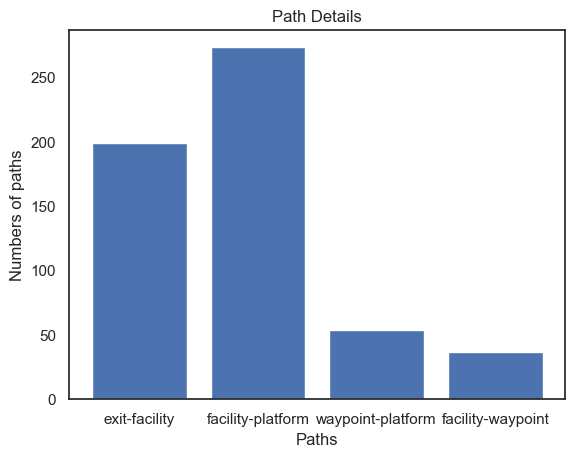

In [4]:
# bar charts for all paths details
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
paths = ['exit-facility', 'facility-platform', 'waypoint-platform', 'facility-waypoint']
x = np.arange(len(paths))
plt.bar(x, paths_counts)
plt.xticks(x, paths)
plt.xlabel('Paths')
plt.ylabel('Numbers of paths')
plt.title('Path Details')
plt.show()

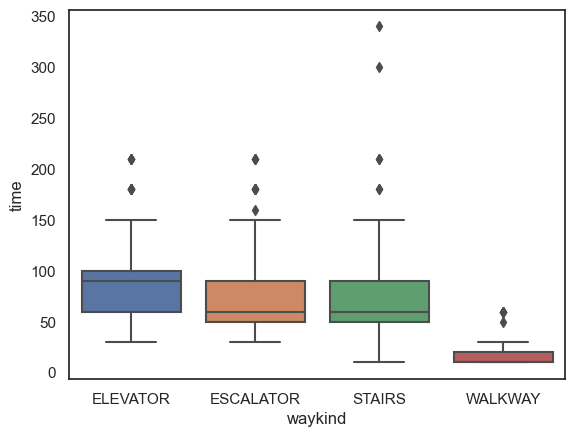

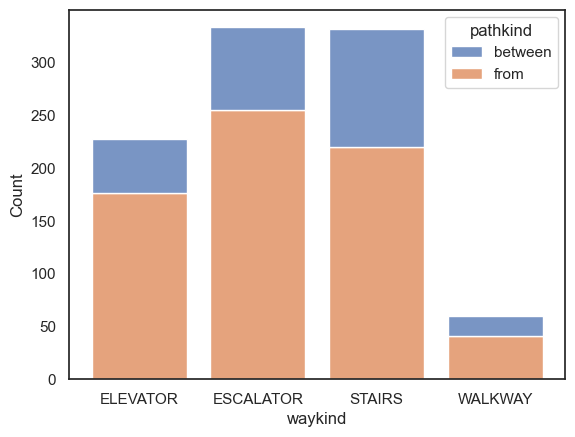

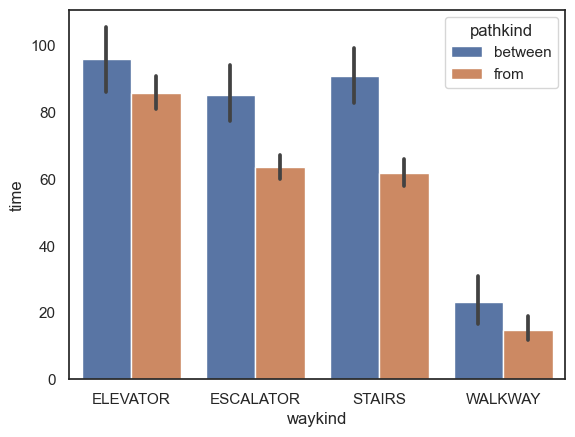

In [5]:
# boxplot 
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
ax = sns.boxplot(y=df_paths_completed["time"],x=df_paths_completed["waykind"])
plt.show()
sns.histplot(data=df_paths_completed, x="waykind", hue="pathkind", multiple="stack", shrink=.8)
plt.show()
df_pairPlot = pd.read_csv('DA_dataset - PariPlot_Paths.csv')
ax = sns.barplot(x=df_pairPlot['waykind'], y=df_pairPlot['time'], data=df_pairPlot, hue="pathkind")
plt.show()

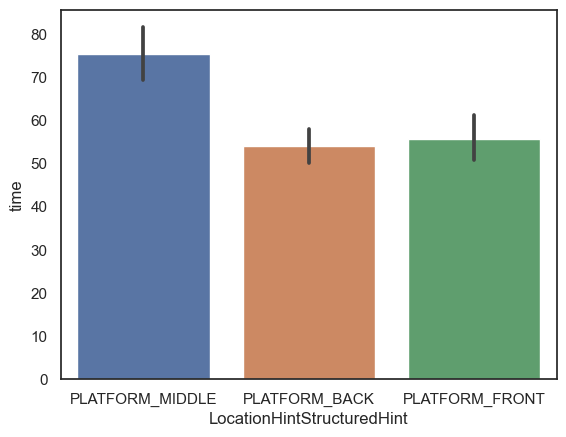

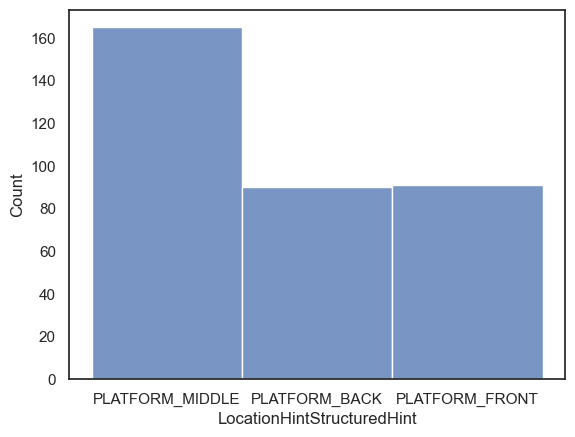

In [6]:
# locationHint bar chart
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
df_locationHint = pd.read_csv('DA_dataset - BarChart_LocationHint.csv')
ax = sns.barplot(x=df_locationHint['LocationHintStructuredHint'], y=df_locationHint['time'], data=df_locationHint)
# ax.set_title('LocationHintStructuredHint')
plt.show()
ax = sns.histplot(x=df_locationHint['LocationHintStructuredHint'], data=df_locationHint)
plt.show()

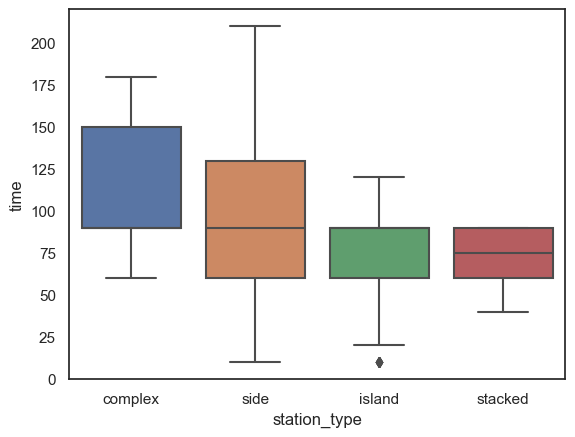

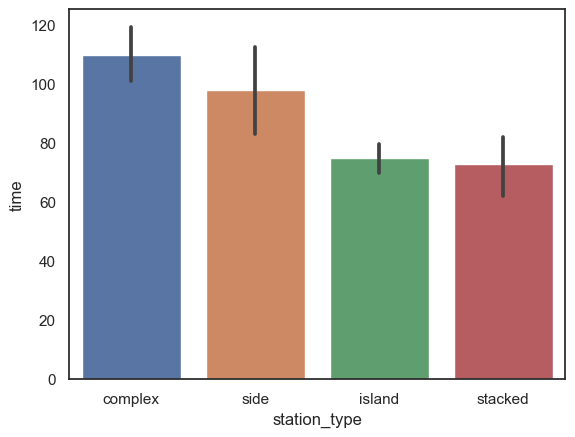

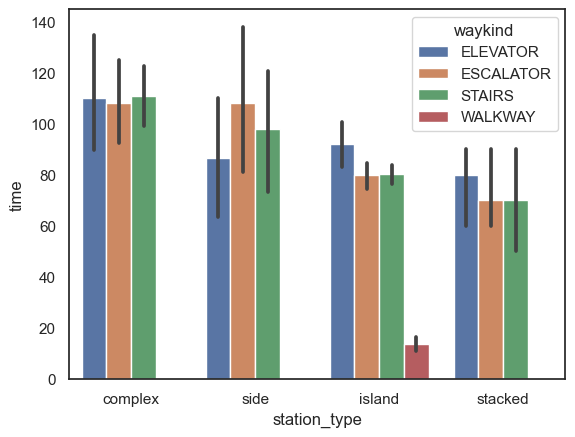

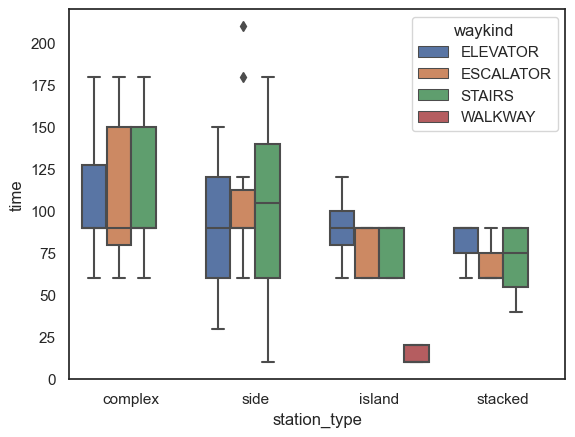

In [7]:
# Time for different Station type (exit - facility) - BoxPlot
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
df_stationType = pd.read_csv('DA_dataset - BarChart_stationType_e2f.csv')
ax = sns.boxplot(x=df_stationType['station_type'], y=df_stationType['time'], data=df_stationType)
plt.show()
ax = sns.barplot(x=df_stationType['station_type'], y=df_stationType['time'], data=df_stationType)
plt.show()
ax = sns.barplot(x=df_stationType['station_type'], y=df_stationType['time'], hue="waykind",data=df_stationType)
plt.show()
ax = sns.boxplot(x=df_stationType['station_type'], y=df_stationType['time'], hue="waykind",data=df_stationType)
plt.show()

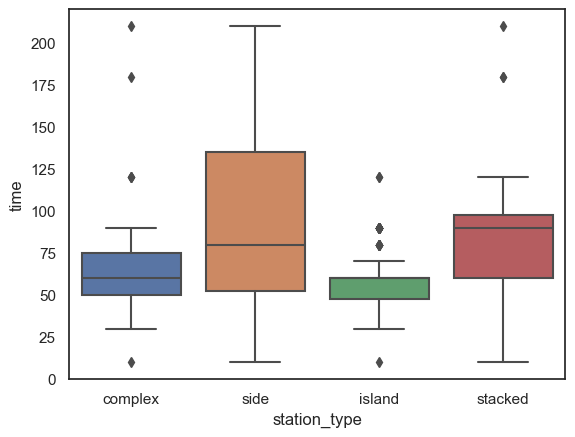

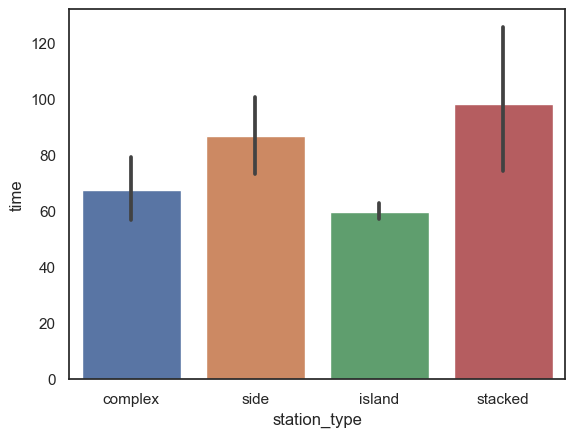

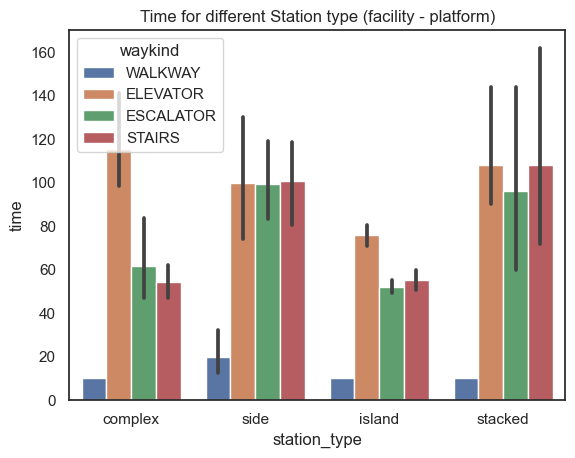

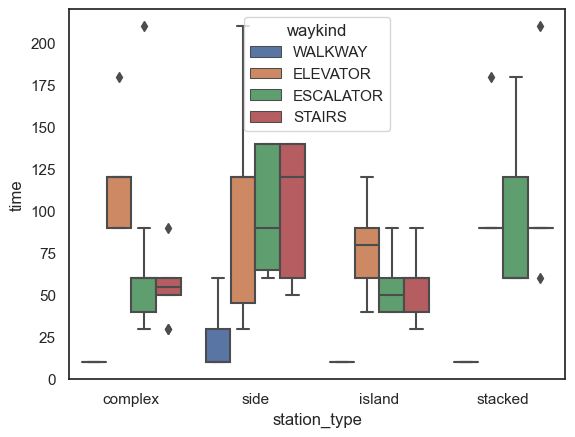

In [8]:
# Time for different Station type (facility - platform) - BoxPlot
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
df_stationType = pd.read_csv('DA_dataset - BarChart_stationType.csv')
ax = sns.boxplot(x=df_stationType['station_type'], y=df_stationType['time'], data=df_stationType)
plt.show()
ax = sns.barplot(x=df_stationType['station_type'], y=df_stationType['time'], data=df_stationType)
plt.show()
ax = sns.barplot(x=df_stationType['station_type'], y=df_stationType['time'], hue="waykind",data=df_stationType)
ax.set_title("Time for different Station type (facility - platform)") 
plt.show()
ax = sns.boxplot(x=df_stationType['station_type'], y=df_stationType['time'], hue="waykind",data=df_stationType)
plt.show()

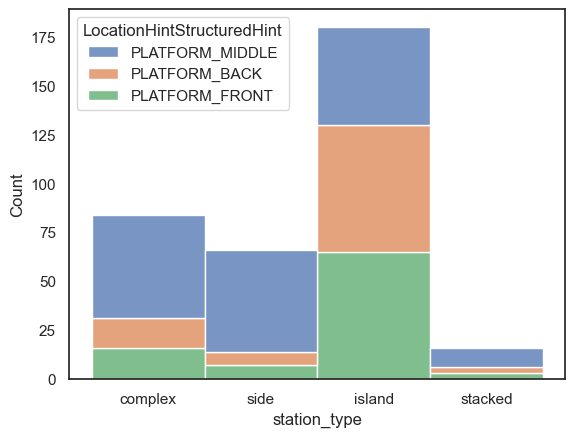

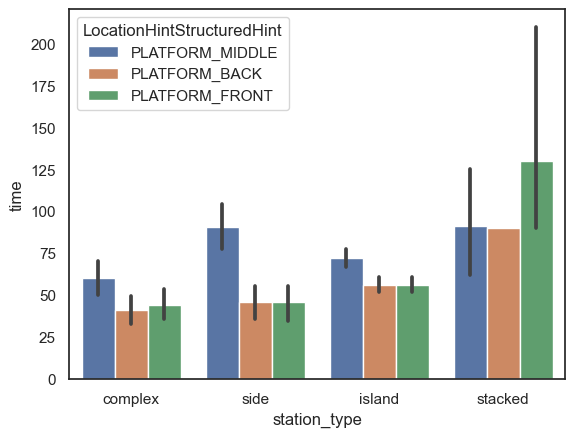

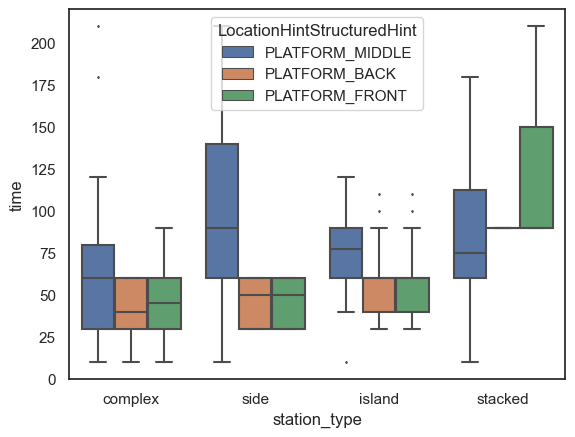

In [9]:
# LocationHint with different station_type
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
df_locationHint = pd.read_csv('DA_dataset - BarChart_LocationHint.csv')
ax = sns.histplot(x='station_type',hue='LocationHintStructuredHint',multiple="stack",data=df_locationHint)
plt.show()
ax = sns.barplot(x='station_type',y='time',hue='LocationHintStructuredHint',data=df_locationHint)
plt.show()
ax = sns.boxplot(x='station_type',y='time',hue='LocationHintStructuredHint',fliersize=1,data=df_locationHint)
plt.show()

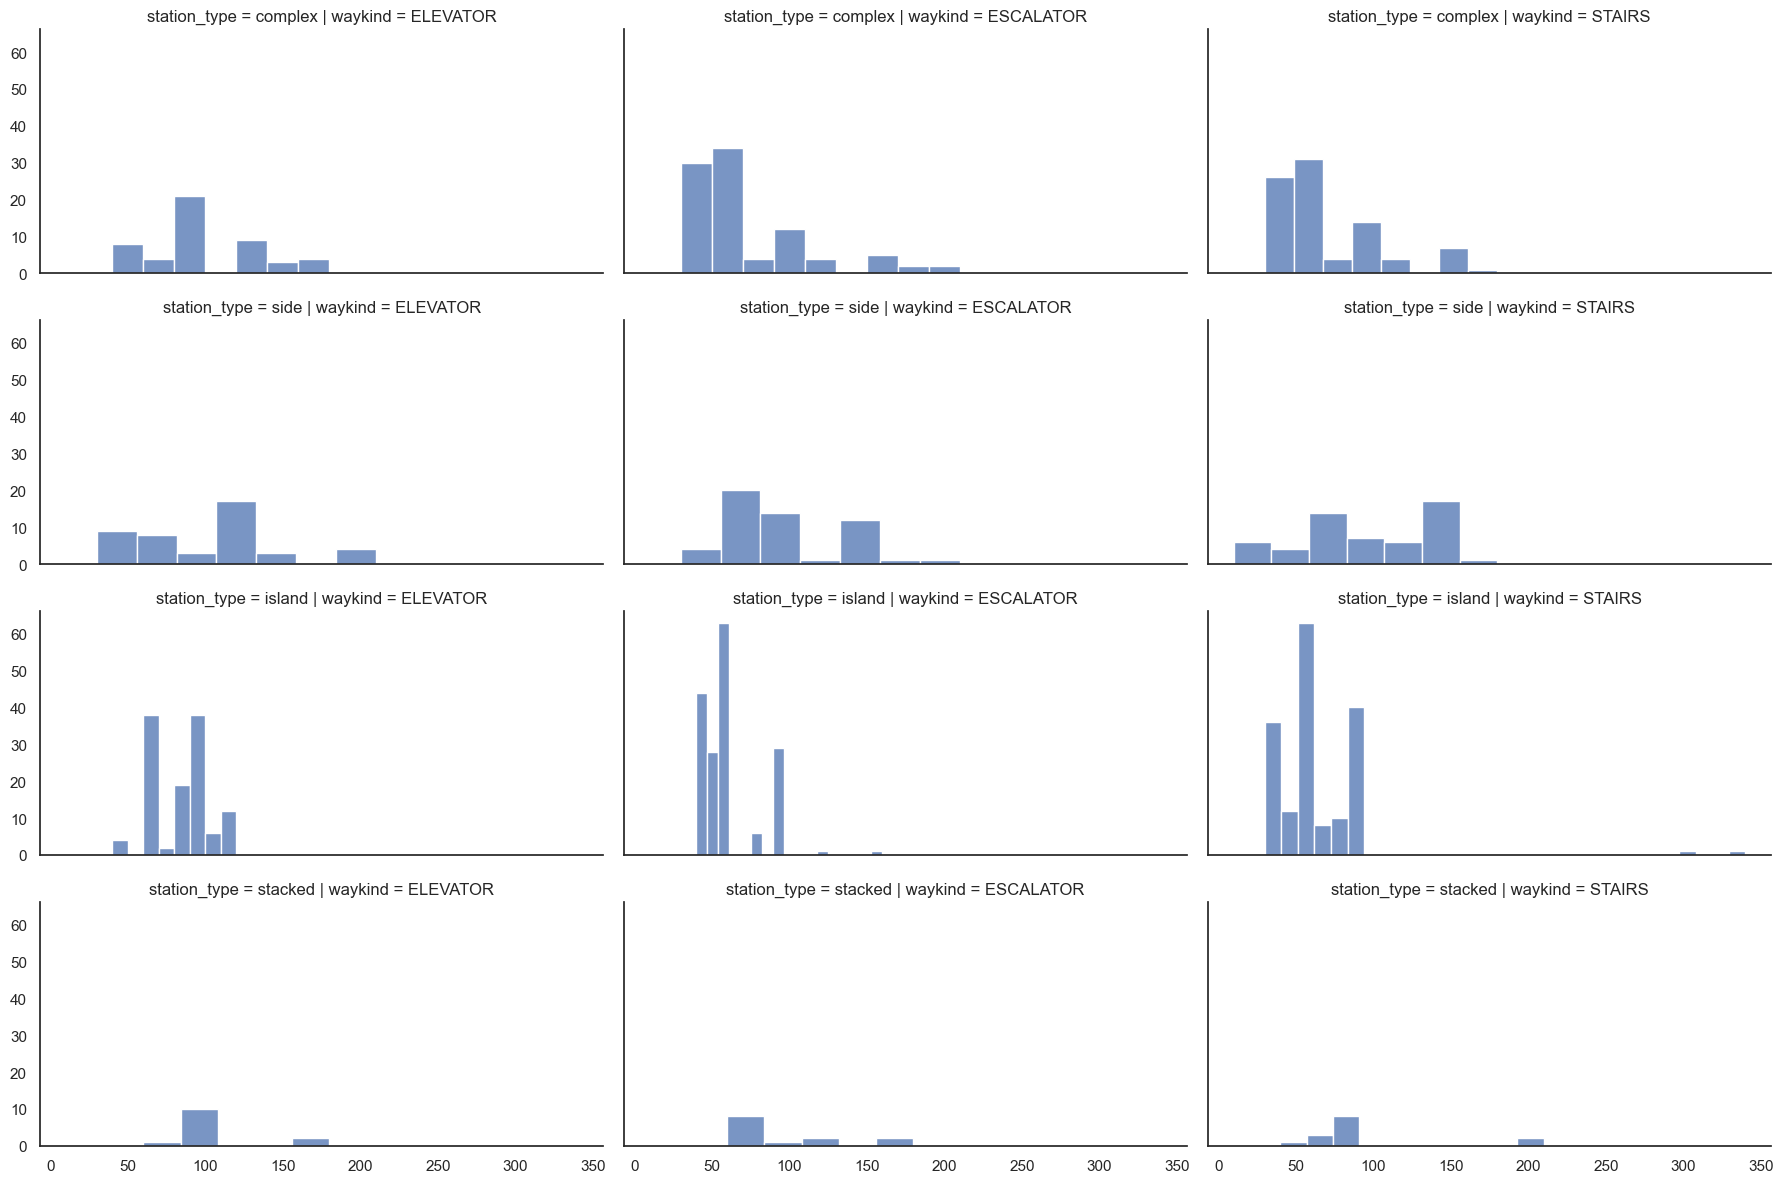

In [14]:
# pairPlot - path
g = sns.FacetGrid(df_pairPlot, col="waykind",  row="station_type", aspect=2)
g.map_dataframe(sns.histplot, x="time")
plt.show()

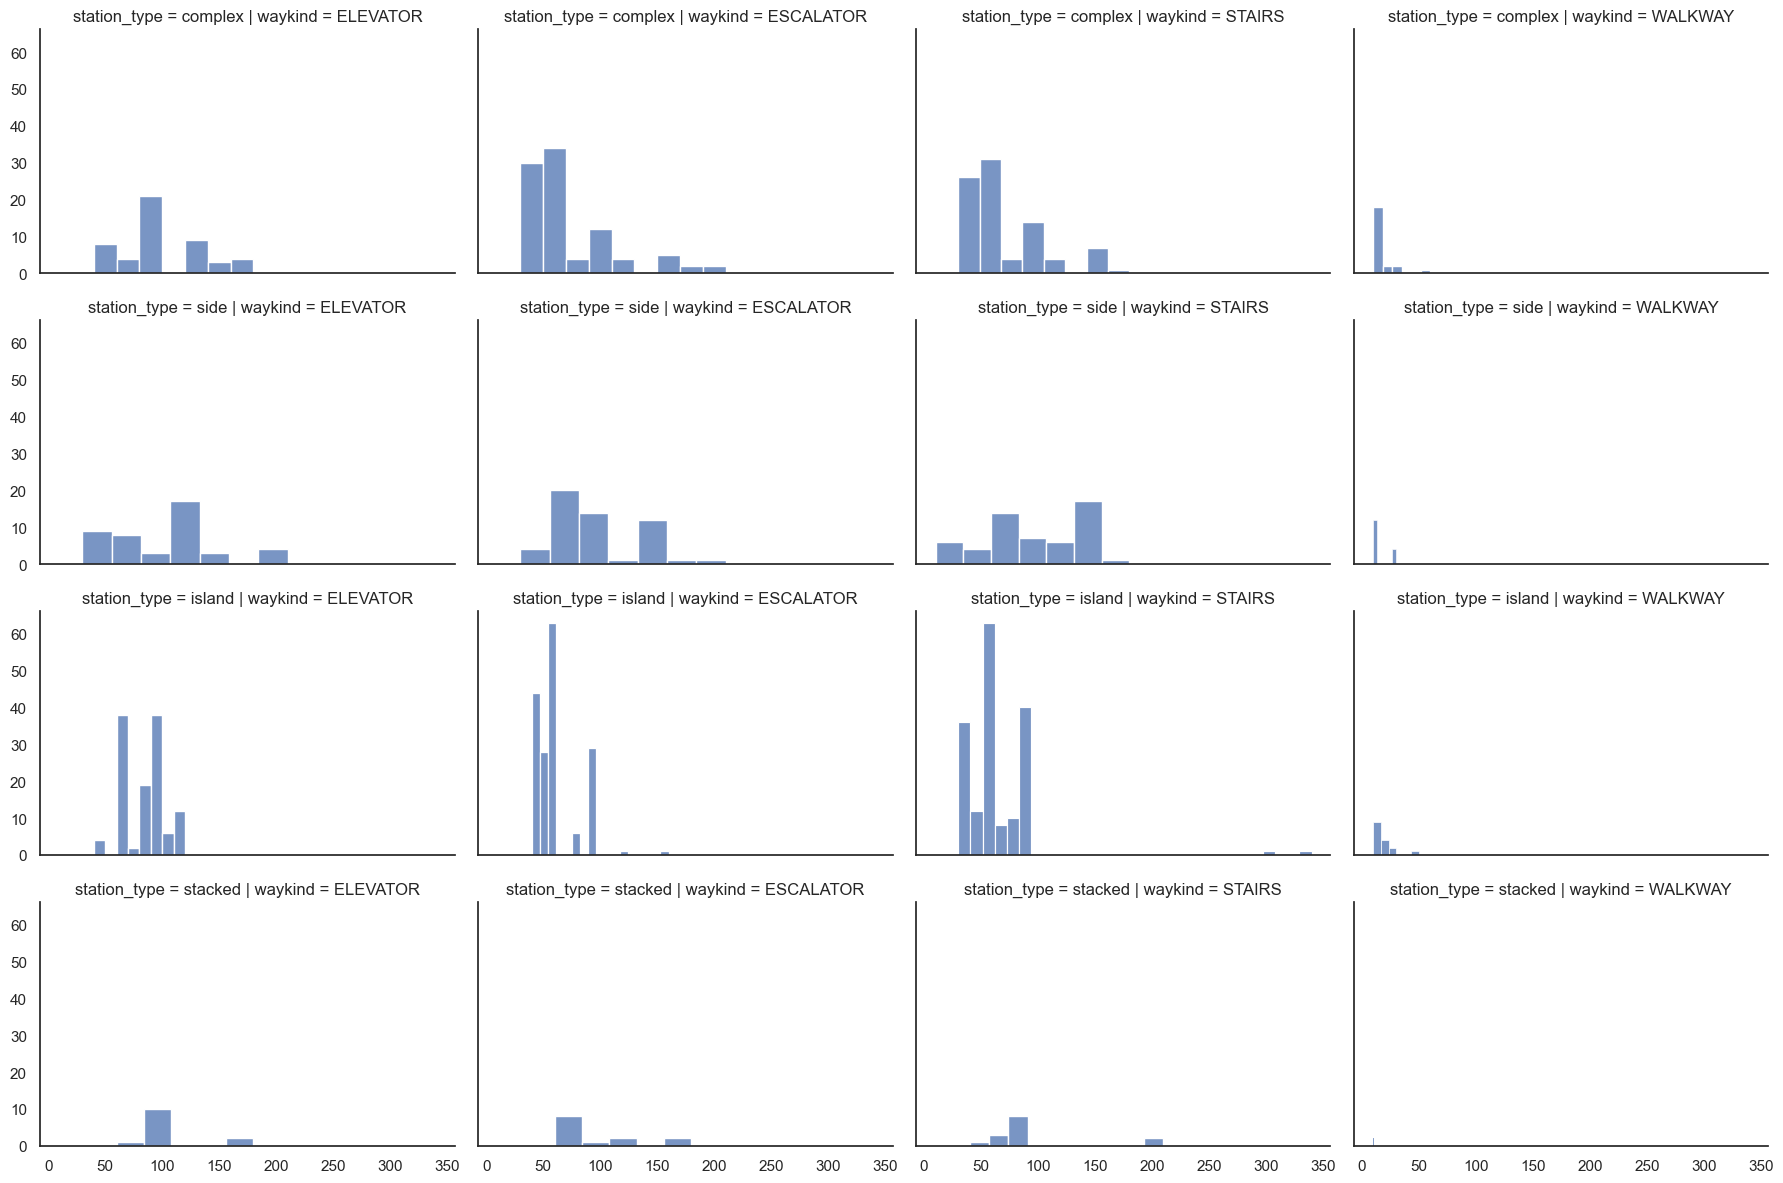

In [11]:
# pairPlot - paths_without600
df_pairPlot = pd.read_csv('DA_dataset - PairPlot_without600.csv')
g = sns.FacetGrid(df_pairPlot, col="waykind",  row="station_type", aspect=1.5)
g.map_dataframe(sns.histplot, x="time")
plt.show()

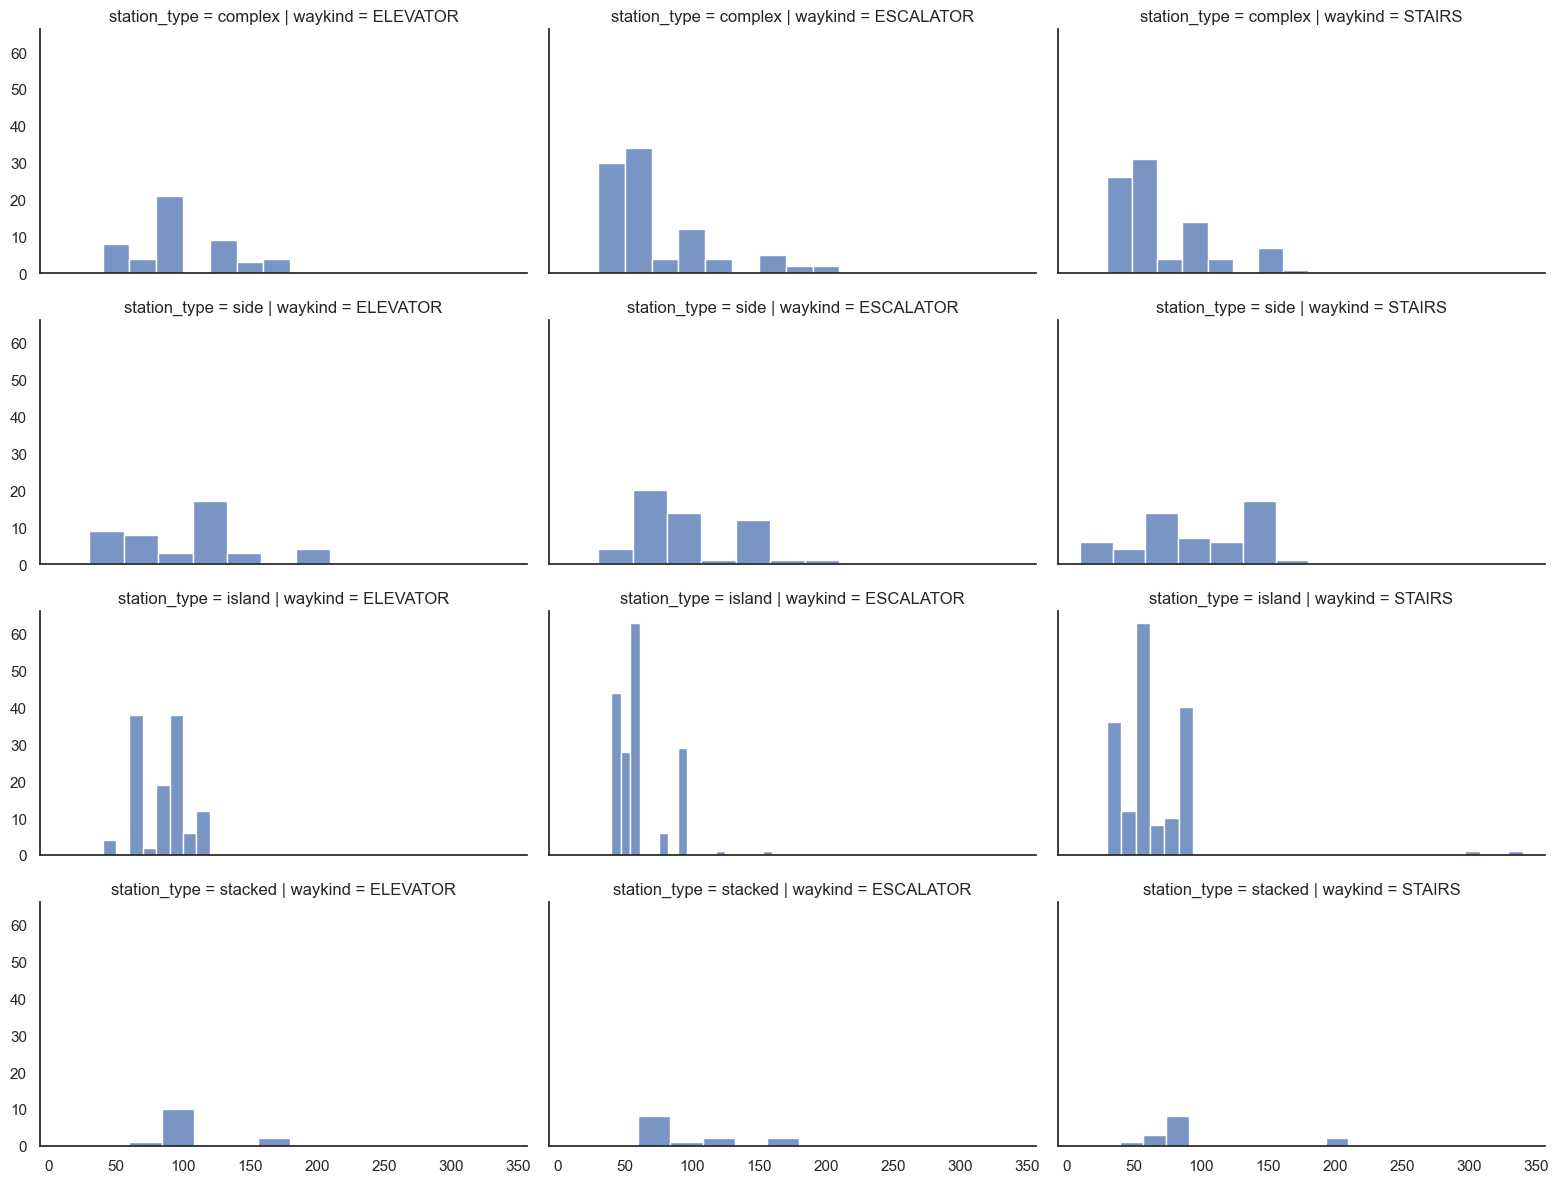

In [17]:
# without WALKWAY
df_pairPlot = pd.read_csv('DA_dataset - PairPlot_without600&WALKWAY.csv')
g = sns.FacetGrid(df_pairPlot, col="waykind",  row="station_type", aspect=1.75)
g.map_dataframe(sns.histplot, x="time")
plt.show()